# Import Libraries

In [1]:
import pandas as pd # library for open files
import numpy as np # Library for mathematical operations
import matplotlib.pyplot as plt # Library for graph
import seaborn as sns # Library for graph

from sklearn.preprocessing import StandardScaler # for scaling data
from sklearn.model_selection import train_test_split # to split data for training & testing
from sklearn.tree import DecisionTreeClassifier # classification with decision tree
from sklearn.metrics import accuracy_score # to get the accuracy score

# Load Data

In [2]:
#                                          Path                                             File Name     Extension
path = r'D:\Abdulrhman Osama\Machine Learning Projects\Smoke Detection Classification\smoke_detection_iot.csv'

df = pd.read_csv(path)

print('Data Frame:')
df.head(10) # show the first ten rows from the data

Data Frame:


,num,UTC,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1,PM2,NC0,NC1,NC2,CNT,Fire_Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.00,0.0,0.000,0.00,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.00,0.0,0.000,0.00,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.00,0.0,0.000,0.00,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.00,0.0,0.000,0.00,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.00,0.0,0.000,0.00,4,0
5,5,1654733336,20.073,54.12,0,400,12419,18998,939.725,0.0,0.00,0.0,0.000,0.00,5,0
6,6,1654733337,20.088,53.61,0,400,12432,19058,939.738,0.0,0.00,0.0,0.000,0.00,6,0
7,7,1654733338,20.103,53.20,0,400,12439,19114,939.758,0.0,0.00,0.0,0.000,0.00,7,0
8,8,1654733339,20.117,52.81,0,400,12448,19155,939.758,0.0,0.00,0.0,0.000,0.00,8,0
9,9,1654733340,20.132,52.46,0,400,12453,19195,939.756,0.9,3.78,0.0,4.369,2.78,9,0


In [3]:
df.shape

(62630, 16)

# Cleaning Data

In [4]:
df.drop('num', axis = 1, inplace = True) # droping the 'num' column

In [5]:
df.head(10) # show the first ten rows from the data

,UTC,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1,PM2,NC0,NC1,NC2,CNT,Fire_Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.00,0.0,0.000,0.00,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.00,0.0,0.000,0.00,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.00,0.0,0.000,0.00,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.00,0.0,0.000,0.00,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.00,0.0,0.000,0.00,4,0
5,1654733336,20.073,54.12,0,400,12419,18998,939.725,0.0,0.00,0.0,0.000,0.00,5,0
6,1654733337,20.088,53.61,0,400,12432,19058,939.738,0.0,0.00,0.0,0.000,0.00,6,0
7,1654733338,20.103,53.20,0,400,12439,19114,939.758,0.0,0.00,0.0,0.000,0.00,7,0
8,1654733339,20.117,52.81,0,400,12448,19155,939.758,0.0,0.00,0.0,0.000,0.00,8,0
9,1654733340,20.132,52.46,0,400,12453,19195,939.756,0.9,3.78,0.0,4.369,2.78,9,0


In [6]:
df.describe().T # describe the data by the minimum, maximum, the number of it, mean, standard deviation, etc...

,count,mean,std,min,25%,50%,75%,max
UTC,62630.0,1.654792e+09,110002.488078,1.654712e+09,1.654743e+09,1.654762e+09,1.654778e+09,1.655130e+09
Temperature,62630.0,1.597042e+01,14.359576,-2.201000e+01,1.099425e+01,2.013000e+01,2.540950e+01,5.993000e+01
Humidity,62630.0,4.853950e+01,8.865367,1.074000e+01,4.753000e+01,5.015000e+01,5.324000e+01,7.520000e+01
TVOC,62630.0,1.942058e+03,7811.589055,0.000000e+00,1.300000e+02,9.810000e+02,1.189000e+03,6.000000e+04
eCO2,62630.0,6.700210e+02,1905.885439,4.000000e+02,4.000000e+02,4.000000e+02,4.380000e+02,6.000000e+04
Raw_H2,62630.0,1.294245e+04,272.464305,1.066800e+04,1.283000e+04,1.292400e+04,1.310900e+04,1.380300e+04
Raw_Ethanol,62630.0,1.975426e+04,609.513156,1.531700e+04,1.943500e+04,1.950100e+04,2.007800e+04,2.141000e+04
Pressure,62630.0,9.386276e+02,1.331344,9.308520e+02,9.387000e+02,9.388160e+02,9.394180e+02,9.398610e+02
PM1,62630.0,1.005943e+02,922.524245,0.000000e+00,1.280000e+00,1.810000e+00,2.090000e+00,1.433369e+04
PM2,62630.0,1.844678e+02,1976.305615,0.000000e+00,1.340000e+00,1.880000e+00,2.180000e+00,4.543226e+04


In [7]:
df.info() # Gives information about the data (string, integer, float, etc...)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UTC          62630 non-null  int64  
 1   Temperature  62630 non-null  float64
 2   Humidity     62630 non-null  float64
 3   TVOC         62630 non-null  int64  
 4   eCO2         62630 non-null  int64  
 5   Raw_H2       62630 non-null  int64  
 6   Raw_Ethanol  62630 non-null  int64  
 7   Pressure     62630 non-null  float64
 8   PM1          62630 non-null  float64
 9   PM2          62630 non-null  float64
 10  NC0          62630 non-null  float64
 11  NC1          62630 non-null  float64
 12  NC2          62630 non-null  float64
 13  CNT          62630 non-null  int64  
 14  Fire_Alarm   62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.2 MB


In [8]:
df.isnull().sum() # Check if there any empty slots in the data or any nulls or not

UTC            0
Temperature    0
Humidity       0
TVOC           0
eCO2           0
Raw_H2         0
Raw_Ethanol    0
Pressure       0
PM1            0
PM2            0
NC0            0
NC1            0
NC2            0
CNT            0
Fire_Alarm     0
dtype: int64

In [9]:
duplicated_rows = df[df.duplicated()] # Check if there any duplicated rows
print(f'The number of duplicated rows is: {duplicated_rows.shape[0]}')

The number of duplicated rows is: 0


In [10]:
X = df.iloc[ : , : -1] # from column 1 to column 14 (Features)
Y = df.iloc[ : , -1] # the last column only (Target)

In [11]:
X.head(10) # show the first ten rows from the data

,UTC,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1,PM2,NC0,NC1,NC2,CNT
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.00,0.0,0.000,0.00,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.00,0.0,0.000,0.00,1
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.00,0.0,0.000,0.00,2
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.00,0.0,0.000,0.00,3
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.00,0.0,0.000,0.00,4
5,1654733336,20.073,54.12,0,400,12419,18998,939.725,0.0,0.00,0.0,0.000,0.00,5
6,1654733337,20.088,53.61,0,400,12432,19058,939.738,0.0,0.00,0.0,0.000,0.00,6
7,1654733338,20.103,53.20,0,400,12439,19114,939.758,0.0,0.00,0.0,0.000,0.00,7
8,1654733339,20.117,52.81,0,400,12448,19155,939.758,0.0,0.00,0.0,0.000,0.00,8
9,1654733340,20.132,52.46,0,400,12453,19195,939.756,0.9,3.78,0.0,4.369,2.78,9


In [12]:
Y.head(10) # show the first ten rows from the data

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Fire_Alarm, dtype: int64

# Data Analysis

In [13]:
Fire_Alarm_Data = df['Fire_Alarm'].value_counts()

Fire_Alarm_Data

Fire_Alarm
1    44757
0    17873
Name: count, dtype: int64

<Axes: xlabel='Fire_Alarm', ylabel='count'>

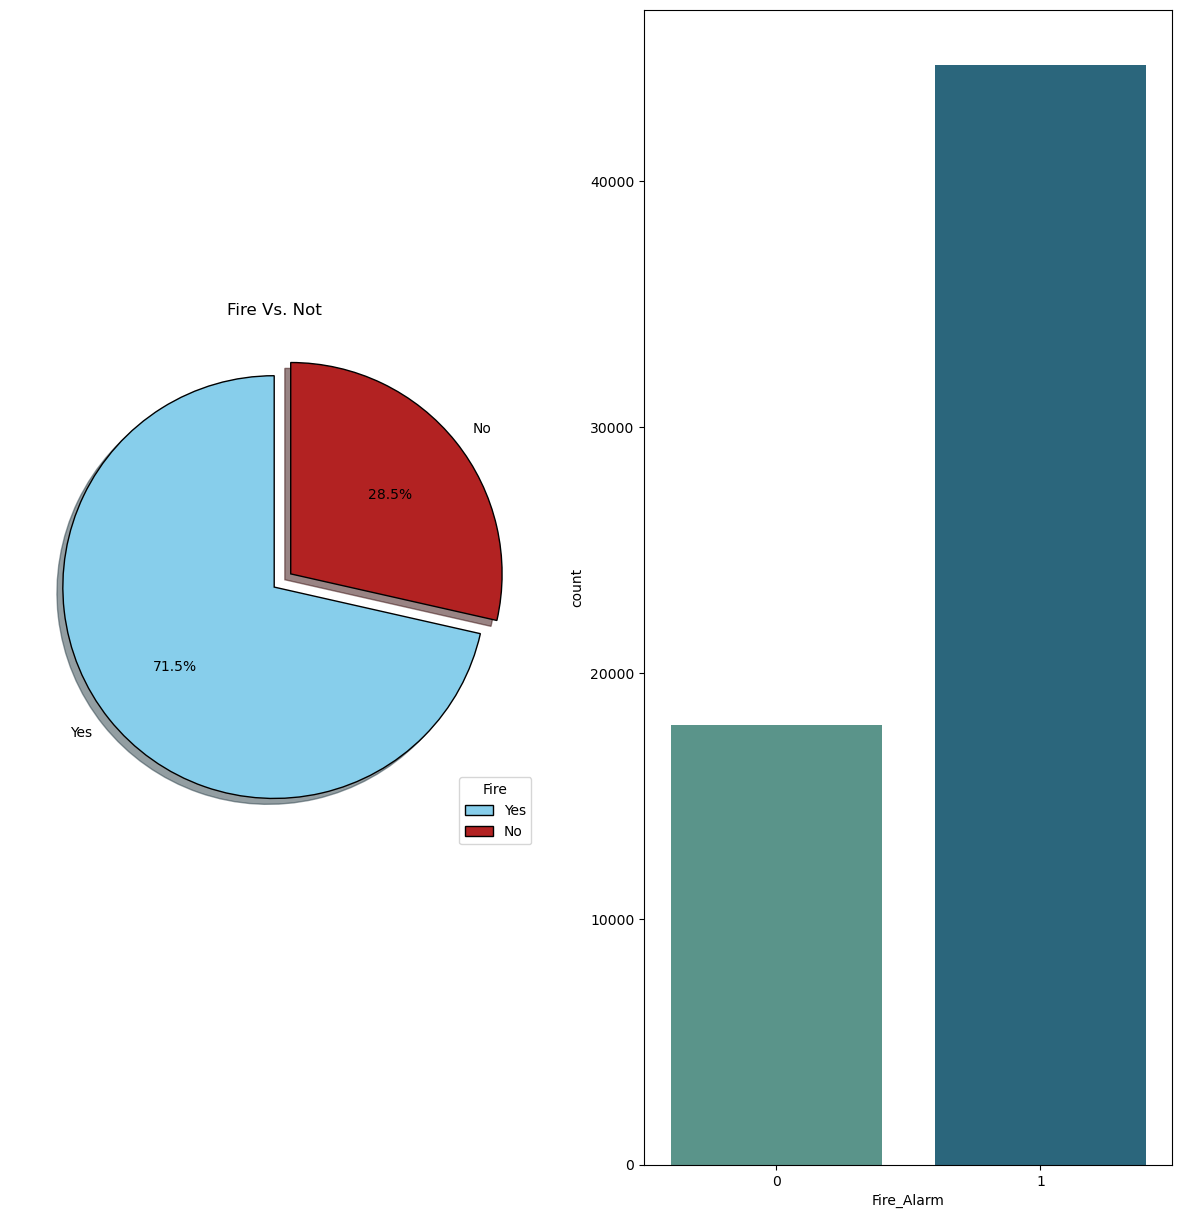

In [14]:
plt.figure(figsize = (15, 15))

plt.subplot(1, 2, 1)
Fire_Alarm_Data.plot(kind = 'pie', ylabel = '', startangle = 90, autopct = '%1.1f%%', colors = ['skyblue', 'firebrick'],
                    labels = ['Yes', 'No'], explode = (0, 0.1), wedgeprops = {'edgecolor' : 'black', 'linewidth' : 1}, shadow = True)
plt.legend(title = 'Fire', loc = 'lower right')
plt.title('Fire Vs. Not')

plt.subplot(1, 2, 2)
sns.countplot(x = 'Fire_Alarm', palette = 'crest', data = df)

# Data Scaling

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
X[1]

array([-0.53393932,  0.2816663 ,  0.91711549, -0.24861434, -0.14167861,
       -2.19279625, -1.8100786 ,  0.83852093, -0.10904333, -0.09334044,
       -0.11521485, -0.09192422, -0.07388861, -1.38334411])

# Data Split

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 50, shuffle = True)

In [18]:
X_train

array([[ 1.01591982,  1.41924378, -3.69750748, ..., -0.09140542,
        -0.07386461, -1.27633959],
       [-0.36267819,  0.32950932,  0.60691717, ..., -0.09117333,
        -0.07385354,  1.09618607],
       [-0.35699645,  0.28138774, -0.10710296, ..., -0.09103652,
        -0.073848  ,  1.17844661],
       ...,
       [-0.11659997,  0.76114111, -0.06536718, ..., -0.09106316,
        -0.07384892,  0.97207136],
       [-0.15771755,  0.59887875,  0.50314173, ..., -0.09112276,
        -0.07385169,  0.37676827],
       [-0.40667754,  0.12205029, -0.1364308 , ..., -0.09106407,
        -0.07384892,  0.45916043]])

In [19]:
Y_train

50802    1
18840    1
19465    1
34424    1
36714    1
        ..
48417    1
22637    1
42891    1
38368    1
14000    1
Name: Fire_Alarm, Length: 43841, dtype: int64

In [20]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('Y_train shape:', Y_train.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (43841, 14)
X_test shape: (18789, 14)
Y_train shape: (43841,)
Y_test shape: (18789,)


# Use Decision Tree

In [21]:
tree_model = DecisionTreeClassifier()

In [22]:
parameter = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [1, 2, 3, 4, 5]
}

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
cv = GridSearchCV(tree_model, parameter, scoring = 'accuracy', cv = 5)

In [25]:
cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [26]:
cv.best_params_

{'criterion': 'log_loss', 'max_depth': 5}

In [27]:
Y_predtree = cv.predict(X_test)

In [28]:
print(f'Train accuracy: {round(accuracy_score(Y_train, cv.predict(X_train)), 3) * 100}')

print(f'Test accuracy: {round(accuracy_score(Y_test, cv.predict(X_test)), 3) * 100}')

Train accuracy: 99.8
Test accuracy: 99.8


# Thank You

# Eng. Abdulrhman Osama